In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [2]:
request_header = {'User-Agent': 'Mozilla/5.0'}

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
title=[]
days=[]
cities=[]
discount_percentage=[]
original_amount=[]
after_discount_amount=[]
trip_type=[]
for trip in ['india','international']:
    for i in range(1,20):
        url=url = f'https://traveltriangle.com/family-packages/{trip}/page/{i}'
        page = requests.get(url,headers = request_header)
        soup = BeautifulSoup(page.text)
        

        container=soup.find_all('div',class_='col-12 p8 pt0')
    
        for j in container:
            trip_type.append(trip)
            a=j.find("p",class_="col-md-12 pl0 fw9 m0 f16 pfc3 at_packageName")
            title.append(a.text)
            
            b=j.find("span",class_='f12 m0 iblock fw7 at_package_duration')
            if b:
                days.append(b.text)
            else:
                days.append(np.nan)
            c=j.find("div",class_="clearfix absolute t60")
            if c:
                cities.append(c.text)
            else:
                cities.append(np.nan)
            d=j.find('span',class_="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label" )
            if d:
                discount_percentage.append(d.text)
            else:
                discount_percentage.append(np.nan)
            e=j.find("span",class_="f12 pfc3 tdl ml8 at_oldprice fw4")
            if e:
                r=re.findall(r'(?:\d{1,},\d{3}|\d{1,},\d{2},\d{3})',e.text)
                if r:
                    original_amount.append(r[0])
                else:
                    original_amount.append(np.nan)
            else:
                original_amount.append(np.nan)
            f=j.find("p",class_="sfc3 m0 f20 fw9 priceVal at_newprice")
            if f:
                r=re.findall(r'(?:\d{1,},\d{3}|\d{1,},\d{2},\d{3})',f.text)
                if r:
                    after_discount_amount.append(r[0])
                else:
                    after_discount_amount.append(np.nan)
            else:
                after_discount_amount.append(np.nan)
            
           
            
            
            
            
            

In [4]:
dic={'title':title,'cities':cities,'days':days,'discount_percentage':discount_percentage,'original_amount':original_amount,'after_discount_amount':after_discount_amount,
     'trip_type':trip_type}

In [27]:
#print(trip_type)

In [5]:
print(len(cities))
print(len(days))
print(len(discount_percentage))
print(len(title))
print(len(original_amount))
print(len(after_discount_amount))
print(len(trip_type))

936
936
936
936
936
936
936


In [6]:
df=pd.DataFrame(dic)

In [7]:
df.head(5)

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
0,Coorg Package For 2 Nights And 3 Days,Cities: Coorg (3D),3 Days & 2 Nights,9% Off,"15,934","14,500",india
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Cities: Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9% Off,"36,484","33,200",india
2,Bestselling Rishikesh Mussoorie Tour Package F...,Cities: Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8% Off,"12,545","11,549",india
3,Mesmerising Manali Trip Package From Chandigarh,Cities: Manali (3D),3 Days & 2 Nights,9% Off,"10,440","9,500",india
4,Top Family Holiday Packages in Goa for an Idea...,Cities: Calangute (5D),5 Days & 4 Nights,8% Off,"10,868","9,999",india


In [8]:
df['trip_type'].unique()

array(['india', 'international'], dtype=object)

In [9]:
df.shape

(936, 7)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
0,Coorg Package For 2 Nights And 3 Days,Cities: Coorg (3D),3 Days & 2 Nights,9% Off,"15,934","14,500",india
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Cities: Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9% Off,"36,484","33,200",india
2,Bestselling Rishikesh Mussoorie Tour Package F...,Cities: Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8% Off,"12,545","11,549",india
3,Mesmerising Manali Trip Package From Chandigarh,Cities: Manali (3D),3 Days & 2 Nights,9% Off,"10,440","9,500",india
4,Top Family Holiday Packages in Goa for an Idea...,Cities: Calangute (5D),5 Days & 4 Nights,8% Off,"10,868","9,999",india
...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Cities: Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12% Off,"90,909","80,000",international
932,Pattaya - A City Of High Rise Condos And Shopp...,Cities: Pattaya (3D),3 Days & 2 Nights,8% Off,"19,565","18,000",international
933,South Korea Tour Package With Airfare,Cities: Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8% Off,"86,956","80,000",international
934,Exhilarating Paris Sightseeing Tour Packages,Cities: Paris (4D),4 Days & 3 Nights,9% Off,"80,769","73,500",international


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  936 non-null    object
 1   cities                 936 non-null    object
 2   days                   936 non-null    object
 3   discount_percentage    934 non-null    object
 4   original_amount        934 non-null    object
 5   after_discount_amount  936 non-null    object
 6   trip_type              936 non-null    object
dtypes: object(7)
memory usage: 51.3+ KB


In [13]:
df['cities']=df['cities'].str.replace('Cities:','')

In [14]:
df['discount_percentage'] = df['discount_percentage'].str.replace('% Off', '', regex=False)



In [15]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),3 Days & 2 Nights,9,"15,934","14,500",india
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9,"36,484","33,200",india
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8,"12,545","11,549",india
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),3 Days & 2 Nights,9,"10,440","9,500",india
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),5 Days & 4 Nights,8,"10,868","9,999",india
...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12,"90,909","80,000",international
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),3 Days & 2 Nights,8,"19,565","18,000",international
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8,"86,956","80,000",international
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),4 Days & 3 Nights,9,"80,769","73,500",international


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  936 non-null    object
 1   cities                 936 non-null    object
 2   days                   936 non-null    object
 3   discount_percentage    934 non-null    object
 4   original_amount        934 non-null    object
 5   after_discount_amount  936 non-null    object
 6   trip_type              936 non-null    object
dtypes: object(7)
memory usage: 51.3+ KB


In [17]:
df['discount_percentage']=df['discount_percentage'].astype('Int64')

In [18]:
df['original_amount']=df['original_amount'].replace(',','',regex=True)

In [19]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),3 Days & 2 Nights,9,15934,"14,500",india
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9,36484,"33,200",india
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8,12545,"11,549",india
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),3 Days & 2 Nights,9,10440,"9,500",india
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),5 Days & 4 Nights,8,10868,"9,999",india
...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12,90909,"80,000",international
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),3 Days & 2 Nights,8,19565,"18,000",international
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8,86956,"80,000",international
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),4 Days & 3 Nights,9,80769,"73,500",international


In [20]:
df['after_discount_amount']=df['after_discount_amount'].replace(',','',regex=True)

In [21]:
df['after_discount_amount']=df['after_discount_amount'].astype('float')

In [22]:
df['original_amount']=df['original_amount'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  936 non-null    object 
 1   cities                 936 non-null    object 
 2   days                   936 non-null    object 
 3   discount_percentage    934 non-null    Int64  
 4   original_amount        934 non-null    float64
 5   after_discount_amount  936 non-null    float64
 6   trip_type              936 non-null    object 
dtypes: Int64(1), float64(2), object(4)
memory usage: 52.2+ KB


In [24]:
df[df['original_amount'].isnull()]

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
742,Magical Dubai Independence Day Tour Package,Dubai (6D),6 Days & 5 Nights,<NA>,NaN,18000.0,international
857,Spectacular Dubai Independence Day Package,Dubai (4D),4 Days & 3 Nights,<NA>,NaN,18000.0,international


In [25]:
df[df['discount_percentage'].isnull()]

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
742,Magical Dubai Independence Day Tour Package,Dubai (6D),6 Days & 5 Nights,<NA>,NaN,18000.0,international
857,Spectacular Dubai Independence Day Package,Dubai (4D),4 Days & 3 Nights,<NA>,NaN,18000.0,international


In [26]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),3 Days & 2 Nights,9,15934.0,14500.0,india
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9,36484.0,33200.0,india
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8,12545.0,11549.0,india
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),3 Days & 2 Nights,9,10440.0,9500.0,india
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),5 Days & 4 Nights,8,10868.0,9999.0,india
...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12,90909.0,80000.0,international
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),3 Days & 2 Nights,8,19565.0,18000.0,international
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8,86956.0,80000.0,international
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),4 Days & 3 Nights,9,80769.0,73500.0,international


In [27]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),3 Days & 2 Nights,9,15934.0,14500.0,india
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9,36484.0,33200.0,india
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8,12545.0,11549.0,india
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),3 Days & 2 Nights,9,10440.0,9500.0,india
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),5 Days & 4 Nights,8,10868.0,9999.0,india
...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12,90909.0,80000.0,international
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),3 Days & 2 Nights,8,19565.0,18000.0,international
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8,86956.0,80000.0,international
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),4 Days & 3 Nights,9,80769.0,73500.0,international


In [28]:
df['day']=df['days'].str.split('&').str.get(0)

In [29]:
df['nights']=df['days'].str.split('&').str.get(1)

In [30]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type,day,nights
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),3 Days & 2 Nights,9,15934.0,14500.0,india,3 Days,2 Nights
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9,36484.0,33200.0,india,5 Days,4 Nights
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8,12545.0,11549.0,india,3 Days,2 Nights
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),3 Days & 2 Nights,9,10440.0,9500.0,india,3 Days,2 Nights
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),5 Days & 4 Nights,8,10868.0,9999.0,india,5 Days,4 Nights
...,...,...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12,90909.0,80000.0,international,8 Days,7 Nights
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),3 Days & 2 Nights,8,19565.0,18000.0,international,3 Days,2 Nights
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8,86956.0,80000.0,international,7 Days,6 Nights
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),4 Days & 3 Nights,9,80769.0,73500.0,international,4 Days,3 Nights


In [31]:
df['day']=df['day'].str.replace('Days','')

In [32]:
df['nights']=df['nights'].str.replace('Nights','')

In [33]:
df

,title,cities,days,discount_percentage,original_amount,after_discount_amount,trip_type,day,nights
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),3 Days & 2 Nights,9,15934.0,14500.0,india,3,2
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),5 Days & 4 Nights,9,36484.0,33200.0,india,5,4
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),3 Days & 2 Nights,8,12545.0,11549.0,india,3,2
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),3 Days & 2 Nights,9,10440.0,9500.0,india,3,2
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),5 Days & 4 Nights,8,10868.0,9999.0,india,5,4
...,...,...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),8 Days & 7 Nights,12,90909.0,80000.0,international,8,7
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),3 Days & 2 Nights,8,19565.0,18000.0,international,3,2
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),7 Days & 6 Nights,8,86956.0,80000.0,international,7,6
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),4 Days & 3 Nights,9,80769.0,73500.0,international,4,3


In [34]:
df.drop(columns='days',inplace=True)

In [35]:
df

,title,cities,discount_percentage,original_amount,after_discount_amount,trip_type,day,nights
0,Coorg Package For 2 Nights And 3 Days,Coorg (3D),9,15934.0,14500.0,india,3,2
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair (4D)Havelock (1D),9,36484.0,33200.0,india,5,4
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh (1D)Mussoorie (2D),8,12545.0,11549.0,india,3,2
3,Mesmerising Manali Trip Package From Chandigarh,Manali (3D),9,10440.0,9500.0,india,3,2
4,Top Family Holiday Packages in Goa for an Idea...,Calangute (5D),8,10868.0,9999.0,india,5,4
...,...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv (3D)Jerusalem (4D)Galilee (1D),12,90909.0,80000.0,international,8,7
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya (3D),8,19565.0,18000.0,international,3,2
933,South Korea Tour Package With Airfare,Seoul (3D)Jeju-do (4D),8,86956.0,80000.0,international,7,6
934,Exhilarating Paris Sightseeing Tour Packages,Paris (4D),9,80769.0,73500.0,international,4,3


In [36]:
df[df['original_amount'].isnull()]

,title,cities,discount_percentage,original_amount,after_discount_amount,trip_type,day,nights
742,Magical Dubai Independence Day Tour Package,Dubai (6D),<NA>,NaN,18000.0,international,6,5
857,Spectacular Dubai Independence Day Package,Dubai (4D),<NA>,NaN,18000.0,international,4,3


In [37]:
df['discount_percentage']=df['discount_percentage'].fillna(0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  936 non-null    object 
 1   cities                 936 non-null    object 
 2   discount_percentage    936 non-null    Int64  
 3   original_amount        934 non-null    float64
 4   after_discount_amount  936 non-null    float64
 5   trip_type              936 non-null    object 
 6   day                    936 non-null    object 
 7   nights                 936 non-null    object 
dtypes: Int64(1), float64(2), object(5)
memory usage: 59.5+ KB


In [39]:
def fill_original(row):
    if pd.isna(row['original_amount']) and row['discount_percentage'] == 0:
        return row['after_discount_amount']
    else:
        return row['original_amount']
df['original_amount'] = df.apply(fill_original,axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  936 non-null    object 
 1   cities                 936 non-null    object 
 2   discount_percentage    936 non-null    Int64  
 3   original_amount        936 non-null    float64
 4   after_discount_amount  936 non-null    float64
 5   trip_type              936 non-null    object 
 6   day                    936 non-null    object 
 7   nights                 936 non-null    object 
dtypes: Int64(1), float64(2), object(5)
memory usage: 59.5+ KB


In [41]:
df.iloc[742]


title                    Magical Dubai Independence Day Tour Package
cities                                                    Dubai (6D)
discount_percentage                                                0
original_amount                                              18000.0
after_discount_amount                                        18000.0
trip_type                                              international
day                                                              6  
nights                                                           5  
Name: 742, dtype: object

In [42]:
df.iloc[857]

title                    Spectacular Dubai Independence Day Package
cities                                                   Dubai (4D)
discount_percentage                                               0
original_amount                                             18000.0
after_discount_amount                                       18000.0
trip_type                                             international
day                                                             4  
nights                                                          3  
Name: 857, dtype: object

In [43]:
df['cities'] = df['cities'].str.replace(r'\(\d+D\)', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

In [44]:
df

,title,cities,discount_percentage,original_amount,after_discount_amount,trip_type,day,nights
0,Coorg Package For 2 Nights And 3 Days,Coorg,9,15934.0,14500.0,india,3,2
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair Havelock,9,36484.0,33200.0,india,5,4
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh Mussoorie,8,12545.0,11549.0,india,3,2
3,Mesmerising Manali Trip Package From Chandigarh,Manali,9,10440.0,9500.0,india,3,2
4,Top Family Holiday Packages in Goa for an Idea...,Calangute,8,10868.0,9999.0,india,5,4
...,...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv Jerusalem Galilee,12,90909.0,80000.0,international,8,7
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya,8,19565.0,18000.0,international,3,2
933,South Korea Tour Package With Airfare,Seoul Jeju-do,8,86956.0,80000.0,international,7,6
934,Exhilarating Paris Sightseeing Tour Packages,Paris,9,80769.0,73500.0,international,4,3


In [45]:
df['Amount_saved']=df['original_amount']-df['after_discount_amount']
df.insert(df.columns.get_loc('after_discount_amount') + 1, 'Amount_saved', df.pop('Amount_saved'))

In [46]:
df

,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
0,Coorg Package For 2 Nights And 3 Days,Coorg,9,15934.0,14500.0,1434.0,india,3,2
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair Havelock,9,36484.0,33200.0,3284.0,india,5,4
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh Mussoorie,8,12545.0,11549.0,996.0,india,3,2
3,Mesmerising Manali Trip Package From Chandigarh,Manali,9,10440.0,9500.0,940.0,india,3,2
4,Top Family Holiday Packages in Goa for an Idea...,Calangute,8,10868.0,9999.0,869.0,india,5,4
...,...,...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv Jerusalem Galilee,12,90909.0,80000.0,10909.0,international,8,7
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya,8,19565.0,18000.0,1565.0,international,3,2
933,South Korea Tour Package With Airfare,Seoul Jeju-do,8,86956.0,80000.0,6956.0,international,7,6
934,Exhilarating Paris Sightseeing Tour Packages,Paris,9,80769.0,73500.0,7269.0,international,4,3


In [47]:
df.isnull().sum()

title                    0
cities                   0
discount_percentage      0
original_amount          0
after_discount_amount    0
Amount_saved             0
trip_type                0
day                      0
nights                   0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.describe()

,discount_percentage,original_amount,after_discount_amount,Amount_saved
count,936.0,936.000000,936.000000,936.000000
mean,9.537393,48383.317308,43861.945513,4521.371795
std,3.360782,47257.735372,42946.970505,5056.270976
min,0.0,3333.000000,2800.000000,0.000000
25%,9.0,16667.000000,15000.000000,1508.000000
50%,9.0,30712.500000,28000.000000,2967.000000
75%,9.0,63238.250000,57509.000000,5676.000000
max,56.0,351648.000000,320000.000000,64746.000000


In [ ]:
df.to_csv('traveltriangle.csv',index=False)

In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [4]:
df=pd.read_csv('traveltriangle.csv')

In [5]:
df

,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
0,Coorg Package For 2 Nights And 3 Days,Coorg,9,15934.0,14500.0,1434.0,india,3,2
1,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Port Blair Havelock,9,36484.0,33200.0,3284.0,india,5,4
2,Bestselling Rishikesh Mussoorie Tour Package F...,Rishikesh Mussoorie,8,12545.0,11549.0,996.0,india,3,2
3,Mesmerising Manali Trip Package From Chandigarh,Manali,9,10440.0,9500.0,940.0,india,3,2
4,Top Family Holiday Packages in Goa for an Idea...,Calangute,8,10868.0,9999.0,869.0,india,5,4
...,...,...,...,...,...,...,...,...,...
931,Evangelical Israel Family Package,Tel Aviv Jerusalem Galilee,12,90909.0,80000.0,10909.0,international,8,7
932,Pattaya - A City Of High Rise Condos And Shopp...,Pattaya,8,19565.0,18000.0,1565.0,international,3,2
933,South Korea Tour Package With Airfare,Seoul Jeju-do,8,86956.0,80000.0,6956.0,international,7,6
934,Exhilarating Paris Sightseeing Tour Packages,Paris,9,80769.0,73500.0,7269.0,international,4,3


In [8]:
df.to_excel('travelcom.xlsx')

In [9]:
import pandas as pd

# Correct way to read an .xlsx file
df = pd.read_excel(r'C:\Users\bhavya\travelcom.xlsx')

print(df.head())


   Unnamed: 0                                              title  \
0           0              Coorg Package For 2 Nights And 3 Days   
1           1  Best 4N 5D Andaman Sightseeing Tour Package Fo...   
2           2  Bestselling Rishikesh Mussoorie Tour Package F...   
3           3    Mesmerising Manali Trip Package From Chandigarh   
4           4  Top Family Holiday Packages in Goa for an Idea...   

                cities  discount_percentage  original_amount  \
0                Coorg                    9            15934   
1  Port Blair Havelock                    9            36484   
2  Rishikesh Mussoorie                    8            12545   
3               Manali                    9            10440   
4            Calangute                    8            10868   

   after_discount_amount  Amount_saved trip_type  day  nights  
0                  14500          1434     india    3       2  
1                  33200          3284     india    5       4  
2             

In [10]:
from openpyxl import load_workbook

wb = load_workbook(r'C:\Users\bhavya\travelcom.xlsx')
sheet = wb.active

for row in sheet.iter_rows(values_only=True):
    print(row)


(None, 'title', 'cities', 'discount_percentage', 'original_amount', 'after_discount_amount', 'Amount_saved', 'trip_type', 'day', 'nights')
(0, 'Coorg Package For 2 Nights And 3 Days', 'Coorg', 9, 15934, 14500, 1434, 'india', 3, 2)
(1, 'Best 4N 5D Andaman Sightseeing Tour Package For A Refreshing Getaway', 'Port Blair Havelock', 9, 36484, 33200, 3284, 'india', 5, 4)
(2, 'Bestselling Rishikesh Mussoorie Tour Package From Delhi', 'Rishikesh Mussoorie', 8, 12545, 11549, 996, 'india', 3, 2)
(3, 'Mesmerising Manali Trip Package From Chandigarh', 'Manali', 9, 10440, 9500, 940, 'india', 3, 2)
(4, 'Top Family Holiday Packages in Goa for an Ideal Family Vacation', 'Calangute', 8, 10868, 9999, 869, 'india', 5, 4)
(5, 'Top 4 Nights 5 Days Best-Selling Sikkim Gangtok Darjeeling Tour Package', 'Gangtok Darjeeling', 16, 26258, 22000, 4258, 'india', 5, 4)
(6, 'Best Selling Kerala Houseboat & Jungle Safari Tour Package', 'Munnar Thekkady Alleppey', 19, 24604, 20048, 4556, 'india', 5, 4)
(7, 'Go on an e

In [11]:
df.to_csv(r'C:\Users\bhavya\travelcom.csv', index=False, encoding='utf-8')


In [12]:
import pandas as pd

# Suppose df is your DataFrame
df.to_excel(r'C:\Users\bhavya\travelcom_saved.xlsx', index=False)


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

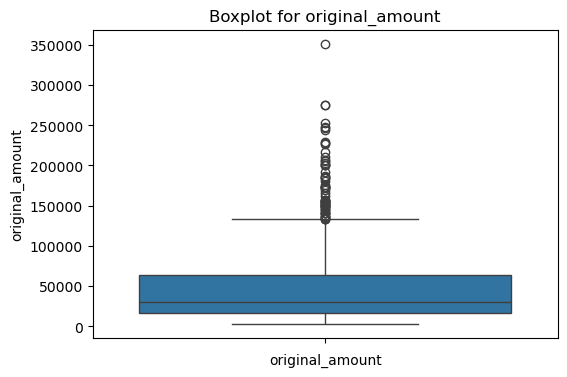

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['original_amount'])
plt.title('Boxplot for original_amount')
plt.xlabel('original_amount')
plt.show()

In [22]:
col = 'original_amount'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# boolean mask and outlier rows
mask = (df[col] < lower) | (df[col] > upper)
outliers = df[mask]

# inspect
print("Outlier count:", mask.sum())
print("Outlier indices:", outliers.index.tolist())
outliers.head()

Outlier count: 63
Outlier indices: [337, 486, 488, 524, 562, 605, 606, 618, 621, 625, 649, 653, 657, 658, 678, 681, 682, 685, 700, 703, 711, 714, 716, 723, 726, 732, 739, 741, 745, 751, 753, 786, 787, 789, 798, 800, 805, 807, 808, 811, 813, 823, 827, 831, 848, 864, 869, 871, 874, 879, 882, 883, 884, 887, 889, 891, 895, 897, 906, 916, 922, 924, 930]


,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
337,Blissful Char Dham Chopper Package,Dehradun Yamunotri Gangotri Guptakashi Badrinath,9,184615.0,168000.0,16615.0,india,6,5
486,Classic Holiday Package To Australia,Sydney Melbourne Gold Coast,7,133418.0,124000.0,9418.0,international,10,9
488,Amazing Europe Family Package,"Rome Venice INTERLAKEN Lucerne, Switzerland",9,155769.0,141750.0,14019.0,international,9,8
524,Enjoyable Europe Family Package,"INTERLAKEN Lucerne, Switzerland Zurich Paris A...",10,168889.0,152000.0,16889.0,international,10,9
562,Maldives And Sri Lanka Family Holiday Package,Colombo Maldives,10,207181.0,185600.0,21581.0,international,6,5


In [23]:
outliers.groupby(by='trip_type').size()

trip_type
india             1
international    62
dtype: int64

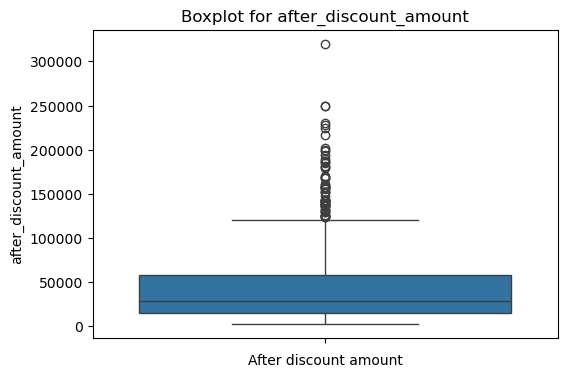

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['after_discount_amount'])
plt.title('Boxplot for after_discount_amount')
plt.xlabel('After discount amount')
plt.show()

In [25]:
col = 'after_discount_amount'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# boolean mask and outlier rows
mask = (df[col] < lower) | (df[col] > upper)
outliers2 = df[mask]

# inspect
print("Outlier count:", mask.sum())
print("Outlier indices:", outliers.index.tolist())
outliers2

Outlier count: 62
Outlier indices: [337, 486, 488, 524, 562, 605, 606, 618, 621, 625, 649, 653, 657, 658, 678, 681, 682, 685, 700, 703, 711, 714, 716, 723, 726, 732, 739, 741, 745, 751, 753, 786, 787, 789, 798, 800, 805, 807, 808, 811, 813, 823, 827, 831, 848, 864, 869, 871, 874, 879, 882, 883, 884, 887, 889, 891, 895, 897, 906, 916, 922, 924, 930]


,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
337,Blissful Char Dham Chopper Package,Dehradun Yamunotri Gangotri Guptakashi Badrinath,9,184615.0,168000.0,16615.0,india,6,5
486,Classic Holiday Package To Australia,Sydney Melbourne Gold Coast,7,133418.0,124000.0,9418.0,international,10,9
488,Amazing Europe Family Package,"Rome Venice INTERLAKEN Lucerne, Switzerland",9,155769.0,141750.0,14019.0,international,9,8
524,Enjoyable Europe Family Package,"INTERLAKEN Lucerne, Switzerland Zurich Paris A...",10,168889.0,152000.0,16889.0,international,10,9
562,Maldives And Sri Lanka Family Holiday Package,Colombo Maldives,10,207181.0,185600.0,21581.0,international,6,5
...,...,...,...,...,...,...,...,...,...
906,Magical South Africa Tour Package,Johannesburg Kruger National Park Knysna Cape ...,13,227816.0,198200.0,29616.0,international,10,9
916,Exuberant South Africa Package,Johannesburg Sun City Knysna Cape Town,12,229545.0,202000.0,27545.0,international,12,11
922,The Wild African Safari Tour Package,Amboseli Naivasha Masai Mara Nairobi,9,153296.0,139499.0,13797.0,international,8,7
924,Rome City Tour Package,Rome Venice LUCERNE Zurich Paris,9,155769.0,141750.0,14019.0,international,10,9


In [20]:
outliers2.groupby(by='trip_type').size()

trip_type
india             1
international    61
dtype: int64

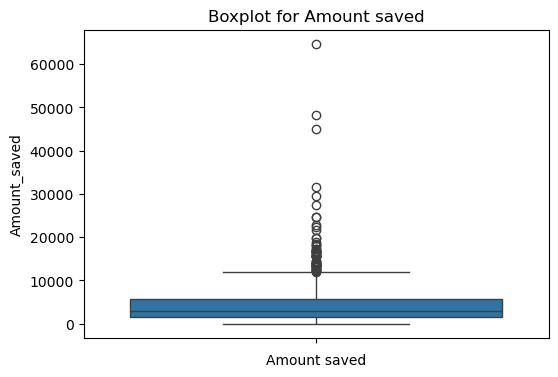

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Amount_saved'])
plt.title('Boxplot for Amount saved')
plt.xlabel('Amount saved')
plt.show()

In [33]:
col ='Amount_saved'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# boolean mask and outlier rows
mask = (df[col] < lower) | (df[col] > upper)
outliers3 = df[mask]

# inspect
print("Outlier count:", mask.sum())
outliers3

Outlier count: 59


,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
306,Sikkim Darjeeling Gangtok Trip Package,Gangtok Darjeeling,14,126464.0,109212.0,17252.0,india,6,5
337,Blissful Char Dham Chopper Package,Dehradun Yamunotri Gangotri Guptakashi Badrinath,9,184615.0,168000.0,16615.0,india,6,5
476,Refreshing Maldives Family Tour Packages From ...,Maldives,56,85714.0,37500.0,48214.0,international,5,4
488,Amazing Europe Family Package,"Rome Venice INTERLAKEN Lucerne, Switzerland",9,155769.0,141750.0,14019.0,international,9,8
495,Dubai : An Extravagant Odyssey,Dubai,19,67542.0,54999.0,12543.0,international,5,4
524,Enjoyable Europe Family Package,"INTERLAKEN Lucerne, Switzerland Zurich Paris A...",10,168889.0,152000.0,16889.0,international,10,9
540,Holyland Israel Tour Package: Egypt & Jordan,Amman Tiberias Bethlehem Taba Cairo,11,131797.0,117299.0,14498.0,international,9,8
541,Ecstatic Maldives Family Package,Maafushi,33,50708.0,34150.0,16558.0,international,4,3
562,Maldives And Sri Lanka Family Holiday Package,Colombo Maldives,10,207181.0,185600.0,21581.0,international,6,5
577,Incredible Europe Honeymoon Package,Rome Florence Venice,11,123876.0,110250.0,13626.0,international,7,6


In [32]:
outliers3.groupby(by='trip_type').size()

trip_type
india             2
international    57
dtype: int64

In [5]:
df=pd.read_csv('traveltriangle.csv')

In [ ]:
df

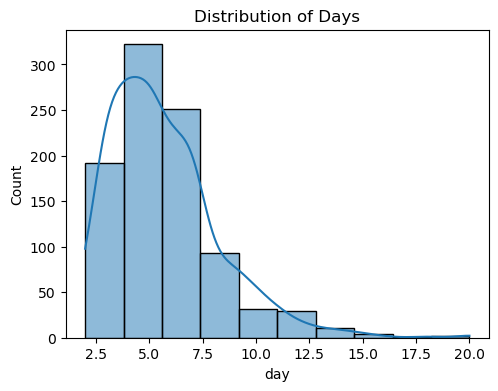

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['day'], bins=10, kde=True)
plt.title('Distribution of Days')
plt.show()


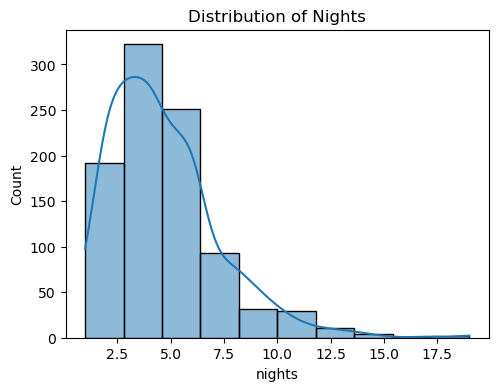

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['nights'], bins=10, kde=True)
plt.title('Distribution of Nights')
plt.show()


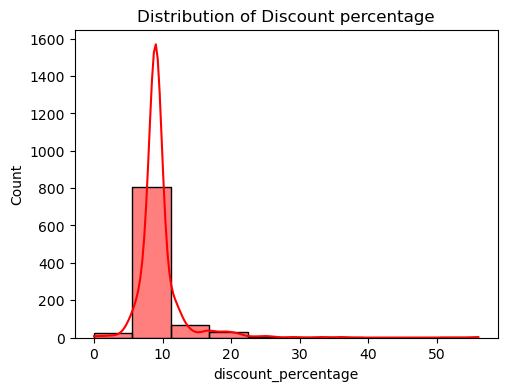

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['discount_percentage'], bins=10, kde=True, color='red')
plt.title('Distribution of Discount percentage')
plt.show()

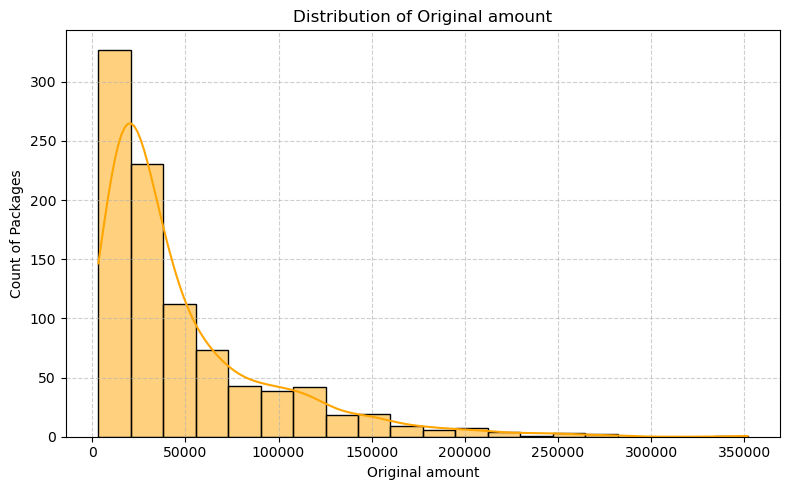

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['original_amount'], bins=20, kde=True,color='orange')
plt.title('Distribution of Original amount')
plt.xlabel('Original amount')
plt.ylabel('Count of Packages')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


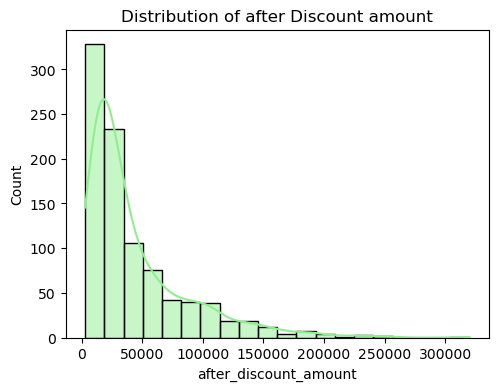

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['after_discount_amount'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of after Discount amount')
plt.show()

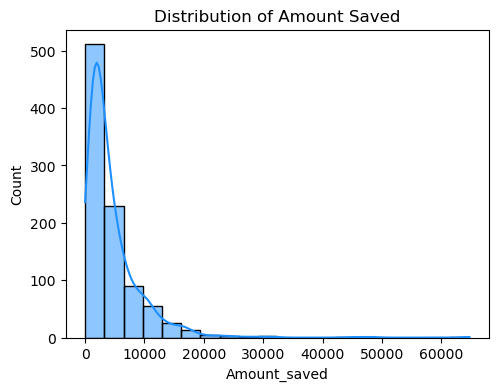

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount_saved'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Amount Saved')
plt.show()

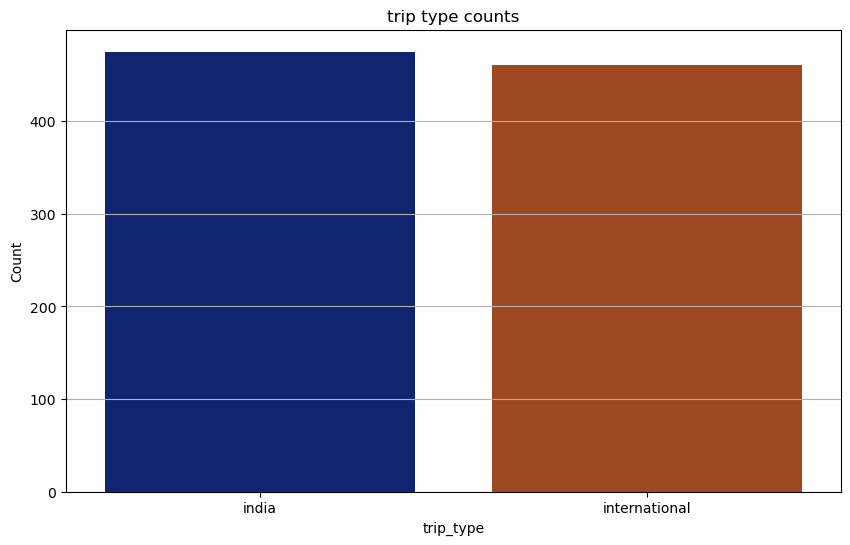

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='trip_type',hue='trip_type',palette='dark')
plt.ylabel('Count')
plt.grid(axis='y')
plt.title('trip type counts')
plt.show()

In [ ]:
df['after_discount_amount',

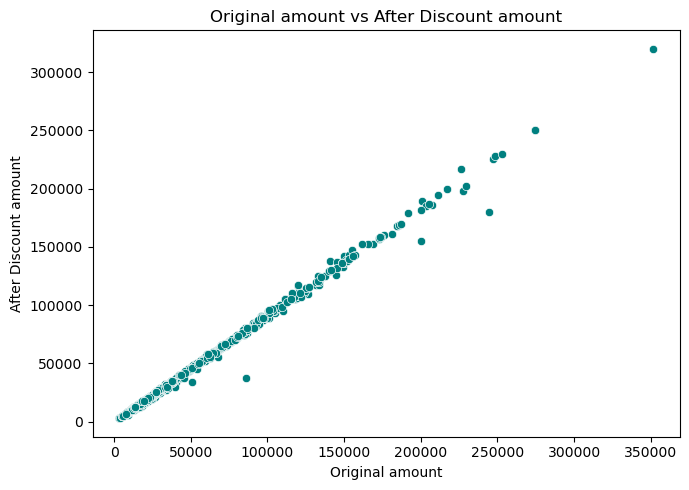

In [26]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='original_amount', y='after_discount_amount', color='teal')
plt.title('Original amount vs After Discount amount')
plt.xlabel('Original amount')
plt.ylabel('After Discount amount')
plt.tight_layout()
plt.show()


In [ ]:
df['Amount_saved

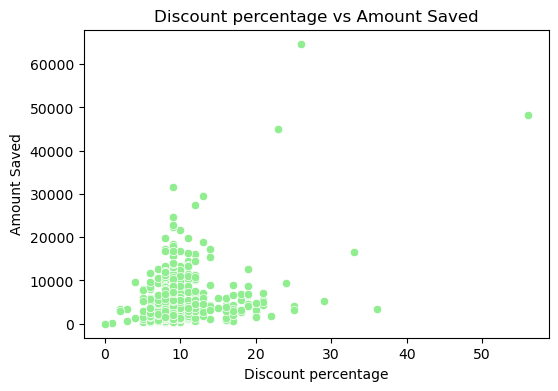

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='discount_percentage', y='Amount_saved',data=df, color='lightgreen')
plt.title('Discount percentage vs Amount Saved')
plt.xlabel('Discount percentage')
plt.ylabel('Amount Saved')
plt.show()

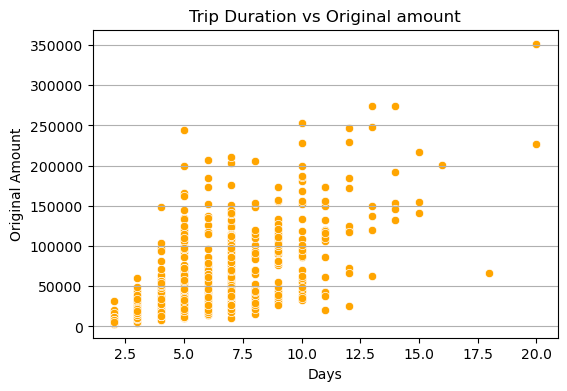

In [35]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='day', y='original_amount', data=df, color='orange')
plt.title('Trip Duration vs Original amount')
plt.xlabel('Days')
plt.ylabel('Original Amount')
plt.grid(axis='y')
plt.show()


In [13]:
df['original_amount'].corr(df['day'])

np.float64(0.6798084096437552)

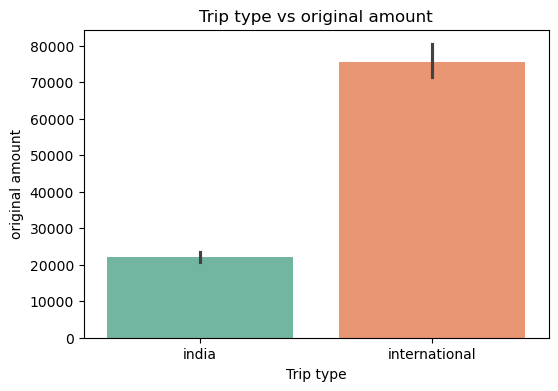

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x='trip_type',y='original_amount',data=df,palette='Set2')
plt.title('Trip type vs original amount')
plt.xlabel('Trip type')
plt.ylabel('original amount')
plt.show()

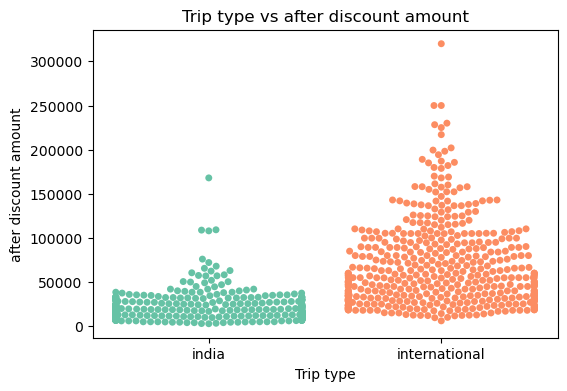

In [38]:
plt.figure(figsize=(6,4))
sns.swarmplot(x='trip_type',y='after_discount_amount',data=df,palette='Set2')
plt.title('Trip type vs after discount amount')
plt.xlabel('Trip type')
plt.ylabel('after discount amount')
plt.show()

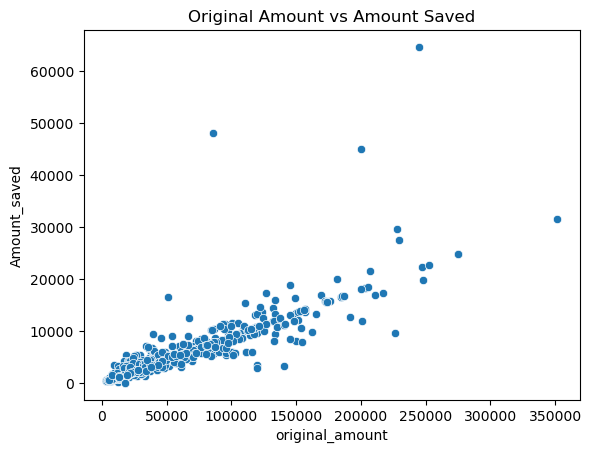

In [34]:
sns.scatterplot(x='original_amount', y='Amount_saved', data=df)
plt.title('Original Amount vs Amount Saved')
plt.show()


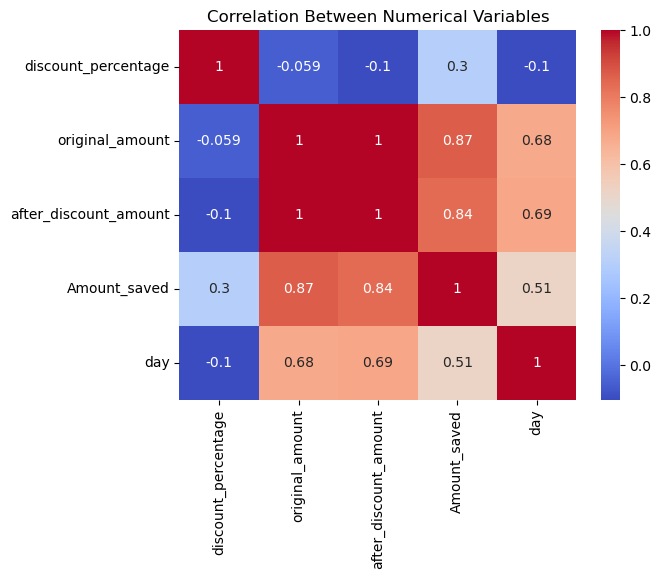

In [36]:


numeric_cols = ['discount_percentage', 'original_amount', 'after_discount_amount', 'Amount_saved', 'day']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Variables')
plt.show()


In [39]:
df.columns

Index(['title', 'cities', 'discount_percentage', 'original_amount',
       'after_discount_amount', 'Amount_saved', 'trip_type', 'day', 'nights'],
      dtype='object')

In [46]:
print(df.columns.tolist())

['title', 'cities', 'discount_percentage', 'original_amount', 'after_discount_amount', 'Amount_saved', 'trip_type', 'day', 'nights']


<Figure size 1500x800 with 0 Axes>

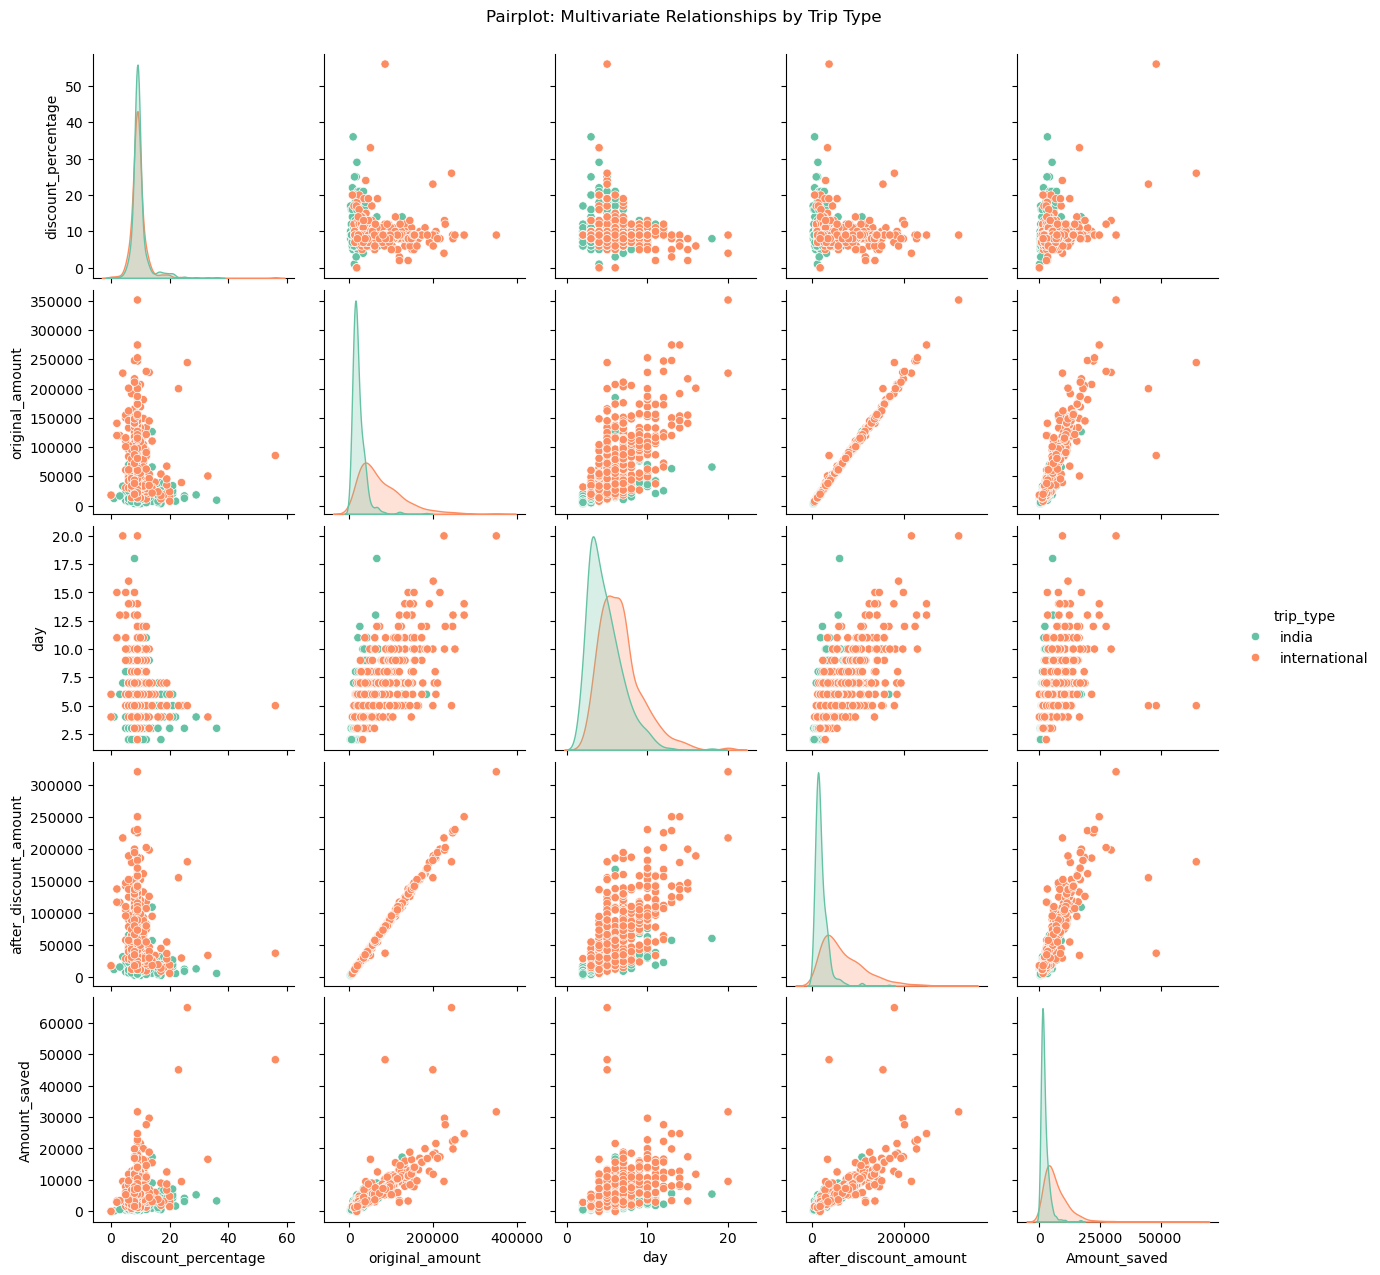

In [48]:
plt.figure(figsize=(15, 8))
sns.pairplot(
    df[['discount_percentage', 'original_amount', 'day', 'after_discount_amount', 'Amount_saved', 'trip_type']],
    hue='trip_type',
    palette='Set2'
)
plt.suptitle('Pairplot: Multivariate Relationships by Trip Type', y=1.02)
plt.show()


Data Analysis

In [ ]:
1) Which type of tour type is most common?

In [22]:
tour = df['trip_type'].value_counts()
tour

trip_type
india            475
international    461
Name: count, dtype: int64

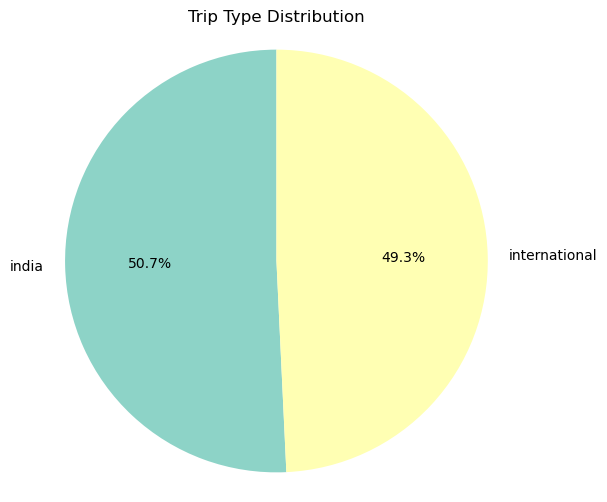

In [24]:
plt.figure(figsize=(6, 6))
colors = plt.cm.Set3.colors  
plt.pie(tour, labels=tour.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Trip Type Distribution')
plt.axis('equal')  # Makes it a perfect circle
plt.show()

In [ ]:
2) Which is the costliest package in India and International ?

In [26]:
costliest = df.groupby(by='trip_type')['after_discount_amount'].max()
costliest

trip_type
india            168000.0
international    320000.0
Name: after_discount_amount, dtype: float64

In [ ]:
3) Which is the lowest price  package in India and International ?

In [18]:
lowest = df.groupby(by='trip_type')['after_discount_amount'].min()
lowest

trip_type
india            2800.0
international    6056.0
Name: after_discount_amount, dtype: float64

In [28]:
df[df['after_discount_amount']==320000.0]

,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
813,Remarkable USA Tour Package,New York Washington DC Philadelphia Atlantic C...,9,351648.0,320000.0,31648.0,international,20,19


In [32]:
df[(df['after_discount_amount'] == 168000.0) & (df['trip_type'] == 'india')]


,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
337,Blissful Char Dham Chopper Package,Dehradun Yamunotri Gangotri Guptakashi Badrinath,9,184615.0,168000.0,16615.0,india,6,5


In [ ]:
4)Trip duration affect the original amount.

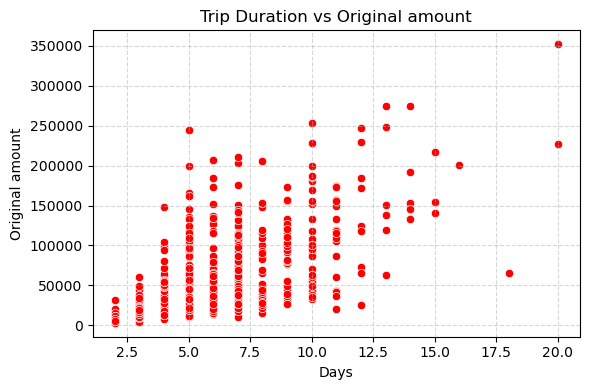

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='day', y='original_amount', data=df, color='red')
plt.title('Trip Duration vs Original amount')
plt.xlabel('Days')
plt.ylabel('Original amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [10]:
df.groupby(by='trip_type')['discount_percentage'].max()

trip_type
india            36
international    56
Name: discount_percentage, dtype: int64

In [11]:
df[df['discount_percentage'] == 36]

,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
115,Exemplary Jaipur Packages For A Vibrant Vacation,Jaipur,36,9333.0,6000.0,3333.0,india,3,2


In [12]:
df[df['discount_percentage'] == 56]

,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
476,Refreshing Maldives Family Tour Packages From ...,Maldives,56,85714.0,37500.0,48214.0,international,5,4


In [33]:
df['original_amount'].corr(df['after_discount_amount'])

np.float64(0.9982796454788554)

In [37]:
df[df['Amount_saved']>42000.0]

,title,cities,discount_percentage,original_amount,after_discount_amount,Amount_saved,trip_type,day,nights
476,Refreshing Maldives Family Tour Packages From ...,Maldives,56,85714.0,37500.0,48214.0,international,5,4
805,Best-Selling Maldives Family Holiday Package,Maldives,23,200000.0,155000.0,45000.0,international,5,4
874,Magnificent Maldives Family Tour Package,Maldives,26,244596.0,179850.0,64746.0,international,5,4
